In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [2]:
numb_x_src_path = '../../Dataset/MixedDataSetAdded.json'
y_src_path = '../../DataBook/Mixed_Data_Analyst2.xlsx'

In [3]:
numb_data = pd.read_json(numb_x_src_path)
numb_data = numb_data.iloc[:, :-59022]

In [4]:
df_supervision = pd.read_excel(y_src_path)
plagiarised_array = df_supervision['Plagiarised'].astype(int).values

In [5]:
X_N = np.nan_to_num(numb_data.values, nan=0, copy=True).astype(int)
y = plagiarised_array

In [6]:
X_N_train, X_N_test, y_N_train, y_N_test = train_test_split(X_N, y, test_size=0.2, random_state=32)

In [7]:
# scaler = StandardScaler()
# X_N_train = scaler.fit_transform(X_N_train)
# X_N_test = scaler.fit_transform(X_N_test)

In [8]:
numbP = Perceptron()
numbP.fit(X_N_train,y_N_train)

percepPredict = numbP.predict(X_N_test)

print(f"Training data score: {numbP.score(X_N_train, y_N_train)}")
print(f"Test data score: {numbP.score(X_N_test, y_N_test)}")

Training data score: 0.9459459459459459
Test data score: 0.8928571428571429


In [42]:
NPH = 128
DROPOUT_RATE = 0.5
numb_model = keras.models.Sequential([
    keras.layers.Input(shape=(16689,)),
    keras.layers.Dense(NPH, activation='relu'),
    keras.layers.Dense(NPH, activation='relu'),
    keras.layers.Dense(NPH, activation='relu'),
    keras.layers.Dense(NPH, activation='relu'),
    keras.layers.Dense(NPH, activation='relu'),
    keras.layers.Dropout(DROPOUT_RATE),
    keras.layers.Dense(NPH, activation='relu'),
    keras.layers.Dropout(DROPOUT_RATE),
    keras.layers.Dense(1, activation='sigmoid')
])

LOSS_FN = keras.losses.BinaryCrossentropy()

numb_model.compile(optimizer='adam', loss=LOSS_FN, metrics=['accuracy'])

history = numb_model.fit(X_N_train, y_N_train, epochs=100, validation_data=(X_N_test, y_N_test))

y_pred_numb_binary_flat = (numb_model.predict(X_N_test).flatten() > 0.5).astype(int)

Epoch 1/100
4/4 [==============================] - 1s 62ms/step - loss: 1019.7322 - accuracy: 0.7838 - val_loss: 490.7653 - val_accuracy: 0.7500
Epoch 2/100
4/4 [==============================] - 0s 24ms/step - loss: 904.4561 - accuracy: 0.7027 - val_loss: 298.0085 - val_accuracy: 0.7500
Epoch 3/100
4/4 [==============================] - 0s 20ms/step - loss: 690.5842 - accuracy: 0.8018 - val_loss: 342.3219 - val_accuracy: 0.7500
Epoch 4/100
4/4 [==============================] - 0s 26ms/step - loss: 483.2061 - accuracy: 0.8378 - val_loss: 237.7184 - val_accuracy: 0.7500
Epoch 5/100
4/4 [==============================] - 0s 22ms/step - loss: 314.4075 - accuracy: 0.7838 - val_loss: 203.9044 - val_accuracy: 0.7857
Epoch 6/100
4/4 [==============================] - 0s 22ms/step - loss: 324.4550 - accuracy: 0.7477 - val_loss: 164.5085 - val_accuracy: 0.7857
Epoch 7/100
4/4 [==============================] - 0s 21ms/step - loss: 314.3523 - accuracy: 0.7297 - val_loss: 161.6400 - val_accuracy

In [10]:
# numb_model.summary()
# numb_model.save("scaled_model.h5")

In [11]:
# for numb, percep, actual in zip(y_pred_numb_binary_flat, percepPredict, y_N_test):
#     print(f"Number: {numb}, Perceptron: {percep} Actual: {actual}")

In [16]:
print(numb_model.evaluate(X_N_test,y_N_test)[1])
#numb_model.save("haldmodel.h5")

1/1 [==============================] - 0s 22ms/step - loss: 2.8413 - accuracy: 0.9286
0.9285714030265808


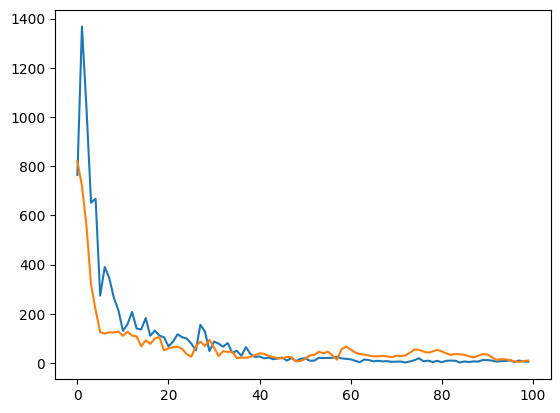

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

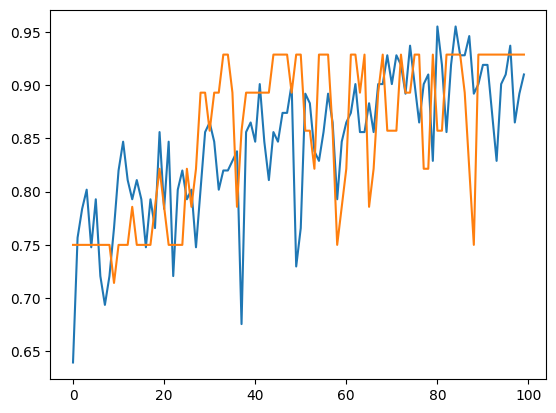

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])